### Objectives

- Random Variables

- Probability Mass Functions

- Distributions

- Cumulative Distribution Functions

- Some Important Distributions

    - Binomial
    - Normal



### Random Variables

Consider an experiment of drawing two cards from a deck of cards: Let's try to write the sample space for this event:

In [27]:
import itertools
import numpy as np
suits = ['diamonds', 'clubs', 'hearts', 'spades']

runs = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']

cards = list(itertools.product(suits, runs))
cards[0:3]

[('diamonds', 'A'), ('diamonds', '2'), ('diamonds', '3')]

In [21]:
# face = [runs[0],runs[-3], runs[-2], runs[-1]]
# num = [1, 11, 12, 13]
# face_dict = dict(zip(face,num))
# face_dict

{'A': 1, 'J': 11, 'Q': 12, 'K': 13}

In [2]:
sample_space = list(itertools.combinations(cards,2))
len(sample_space)

1326

In [35]:
hundred  = sample_space[100]
hundred_1 = hundred[0]
hundred_2 = hundred[1]
print(hundred)
print(hundred_1[1])
print(hundred_2[1])

(('diamonds', '2'), ('spades', 'K'))
2
K


Let's us define a function $X: S \to \mathbb{N}$ on this sample space such that when X(card1, card2) = card1 + card2. 

(J = 11, Q = 12, K=13, A = 1)

Let's write this function in code:


In [4]:
royal_num = {'A':1, 'J':11, 'Q':12, 'K':13}
def random_variable(two_cards):
    num1 = 0 # iniciate 
    num2 = 0 # inicate 
    card1 = two_cards[0] # get the fist card 
    card2 = two_cards[1] # get the first card 
    if card1[1] in royal_num.keys(): # loop through the first card and check if the card is int 
        num1 = royal_num[card1[1]]
    else:
        num1 = int(card1[1])
    if card2[1] in royal_num.keys():
        num2 = royal_num[card2[1]]
    else:
        num2 = int(card2[1])
    return num1 + num2
card_index = np.random.choice(range(1300),1)[0]
print(sample_space[card_index])
random_variable(sample_space[card_index])

(('spades', '5'), ('spades', '7'))


12

In [86]:
all_values = [random_variable(a) for a in sample_space ] # list comprehenstion 
len(all_values)

1326

In [91]:
# np.unique(all_values, return_counts=True)
val_count  = np.unique(all_values, return_counts=True)
val, count = val_count[0], val_count[1]
print(val)
print(count)

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26]
[  6  16  22  32  38  48  54  64  70  80  86  96 102  96  86  80  70  64
  54  48  38  32  22  16   6]


In [94]:
sum_count = dict(zip(val,count))
print(sum_count)

{2: 6, 3: 16, 4: 22, 5: 32, 6: 38, 7: 48, 8: 54, 9: 64, 10: 70, 11: 80, 12: 86, 13: 96, 14: 102, 15: 96, 16: 86, 17: 80, 18: 70, 19: 64, 20: 54, 21: 48, 22: 38, 23: 32, 24: 22, 25: 16, 26: 6}


In [7]:
# import matplotlib.pyplot as plt
# %matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


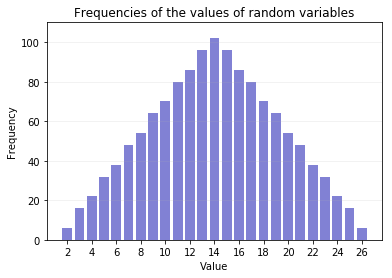

In [8]:
n, bins, patches = plt.hist(x=all_values, bins=range(2,28), color='#0504aa',
                            alpha=0.5, rwidth= 0.8,align = 'left' )
plt.grid(axis='y', alpha=0.2)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(range(2,28,2))
plt.title('Frequencies of the values of random variables')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

plt.show()

#### Probability mass functions

Q: Can we find the probabilities corresponding to these values?

In [9]:
def mass_function(x):
    outcomes = []
    for i in sample_space:
        if random_variable(i) == x:
            outcomes.append(i)
    
    return len(outcomes)/len(sample_space)

In [ ]:
mass_fun

In [10]:
l = [mass_function(k) for k in all_values ]

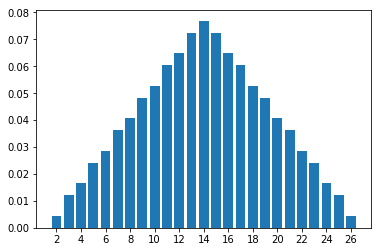

In [11]:
plt.bar(all_values,l)

plt.xticks(range(2,28,2))

plt.show()

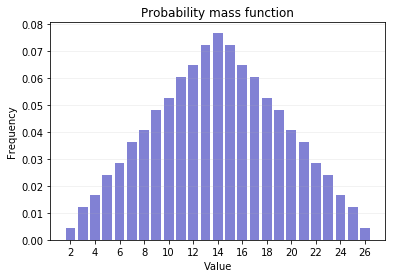

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
n, bins, patches = plt.hist(x=all_values, bins=range(2,28), color='#0504aa',
                            alpha=0.5, rwidth= 0.8,align = 'left' , density = True)
plt.grid(axis='y', alpha=0.2)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(range(2,28,2))
plt.title('Probability mass function')
maxfreq = n.max()
# Set a clean upper y-axis limit.
# plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

plt.show()

In [97]:
len(x)

1326

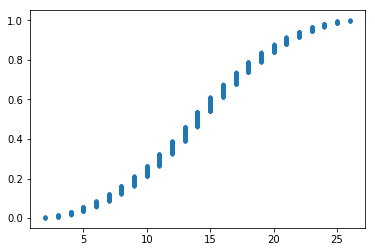

In [95]:
x = np.sort(all_values)
y = np.arange(1,len(x)+1)/len(x)
plt.plot(x,y, marker = '.',linestyle = 'none')
plt.show()

In [14]:
### A code that creates full of house

suits = ['diamonds', 'clubs', 'hearts', 'spades']

runs = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']

cards = list(itertools.product(suits, runs))

new_deck = []
for i in cards:
    new_card = i[0] + i[1]
    new_deck.append(new_card)
    
def create_three_combos(num):
    l = list(itertools.combinations(suits, 3))
    m = [[k[0]+num, k[1]+num, k[2]+num] for k in l]
    return m

def create_two_combos(num):
    l = list(itertools.combinations(colors, 2))
    m = [[k[0]+num, k[1]+num] for k in l]
    return m

three_combos  = []
two_combos = []
for i in nums:
    three_combos += create_three_combos(i)
    two_combos += create_two_combos(i)

full_house = []
for i in three_combos:
    full_house += [i + j for j in two_combos if i[0][-1] != j[0][-1]]

NameError: name 'nums' is not defined

## Note

In [25]:
dice1 = [1, 2, 3, 4, 5, 6]
dice2= [1, 2, 3, 4, 5, 6]
dices = list(itertools.product(dice1,dice2))
len(dices) # 36 values 

36

In [83]:
royal_num = {'A':1, 'J':11, 'Q':12, 'K':13}
def chose_randomely(two_cards):
#     for i in two_cards:
    num1 = 0
    num2 = 0
    card1 = two_cards[0]
#     print(card1)
    card2 = two_cards[1]

    if card1[1] in royal_num.keys():
        num1 = royal_num[card1[1]]
    else:
        num1 = int(card1[1])

#             num1 = int(card1[1])

    if card2[1] in royal_num.keys():
        num2 = royal_num[card2[1]]
    else:
        num2 = int(card2[1][1])
    return num1 + num2 

In [84]:
new_sample = sample_space[100]
print(new_sample)
# print(new_sample[0])
chose_randomely(new_sample)
# type(int(new_sample[0][1][1]))

(('diamonds', '2'), ('spades', 'K'))


15